<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_10_(12_Feb)_Surge_Pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

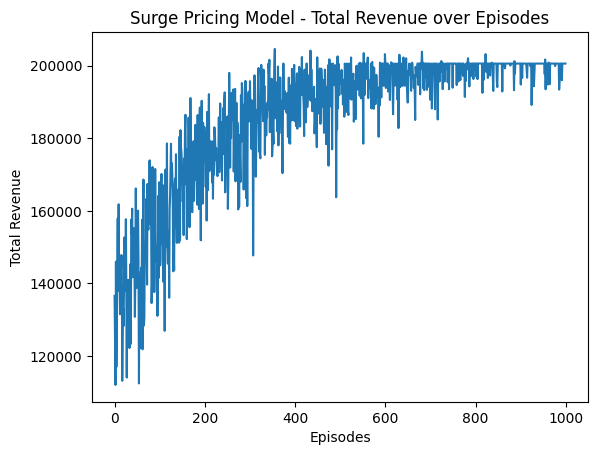

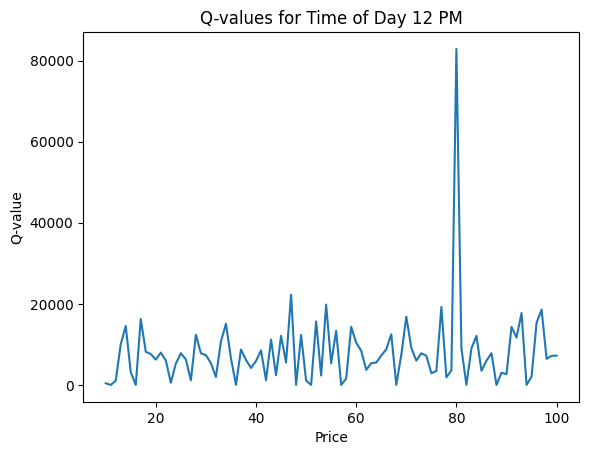

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Environment setup
class SurgePricingEnv:
    def __init__(self):
        self.max_price = 100  # Max price limit
        self.min_price = 10   # Min price limit
        self.demand_sensitivity = 0.1  # Demand sensitivity to price
        self.time_of_day_factor = 0.05  # Time of day effect on demand

    def get_demand(self, price, time_of_day):
        """
        Simulate the demand based on price and time of day.
        Price sensitivity factor increases demand when price decreases.
        """
        base_demand = 100  # Base demand at a price of 50
        demand = base_demand - self.demand_sensitivity * (price - 50) + self.time_of_day_factor * (time_of_day - 12)
        return max(demand, 0)  # Demand can't be negative

    def get_revenue(self, price, time_of_day):
        """
        Calculate the revenue based on price and demand.
        """
        demand = self.get_demand(price, time_of_day)
        return price * demand

    def step(self, price, time_of_day):
        """
        Simulate one step (time step) by returning the reward (revenue) and next state (price, time).
        """
        reward = self.get_revenue(price, time_of_day)
        next_time = (time_of_day + 1) % 24  # Cycle through 24-hour time frame
        return reward, next_time

# Q-learning agent
class QLearningAgent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros((101, 24))  # Q-table: (price, time_of_day)
        self.learning_rate = 0.1  # Alpha
        self.discount_factor = 0.9  # Gamma
        self.exploration_rate = 1.0  # Epsilon (for exploration)
        self.exploration_decay = 0.995  # Epsilon decay after each action

    def choose_action(self, time_of_day):
        """
        Choose an action (price) based on epsilon-greedy strategy.
        """
        if random.uniform(0, 1) < self.exploration_rate:
            return random.randint(self.env.min_price, self.env.max_price)  # Exploration
        else:
            return np.argmax(self.q_table[:, time_of_day]) + self.env.min_price  # Exploitation

    def learn(self, price, next_price, reward, next_time):
        """
        Update the Q-table using the Q-learning update rule.
        """
        current_q_value = self.q_table[price - self.env.min_price, time_of_day]
        max_future_q = np.max(self.q_table[:, next_time])  # Max Q-value for the next time step
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * max_future_q - current_q_value)
        self.q_table[price - self.env.min_price, time_of_day] = new_q_value

    def update_exploration_rate(self):
        """
        Decay exploration rate to reduce exploration over time.
        """
        self.exploration_rate *= self.exploration_decay

# Training process
env = SurgePricingEnv()
agent = QLearningAgent(env)

# Simulate for 1000 episodes
episodes = 1000
episode_rewards = []

for episode in range(episodes):
    total_reward = 0
    time_of_day = random.randint(0, 23)  # Random start time

    for _ in range(24):  # Simulate for 24 hours
        price = agent.choose_action(time_of_day)
        reward, next_time = env.step(price, time_of_day)
        total_reward += reward

        agent.learn(price, price, reward, next_time)
        time_of_day = next_time

    agent.update_exploration_rate()
    episode_rewards.append(total_reward)

# Visualize the results
plt.plot(episode_rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Revenue')
plt.title('Surge Pricing Model - Total Revenue over Episodes')
plt.show()

# Visualize the learned Q-table (for a specific time of day)
time_of_day = 12  # Example: 12 PM
prices = np.arange(env.min_price, env.max_price + 1)
q_values = [agent.q_table[price - env.min_price, time_of_day] for price in prices]

plt.plot(prices, q_values)
plt.xlabel('Price')
plt.ylabel('Q-value')
plt.title(f'Q-values for Time of Day {time_of_day} PM')
plt.show()


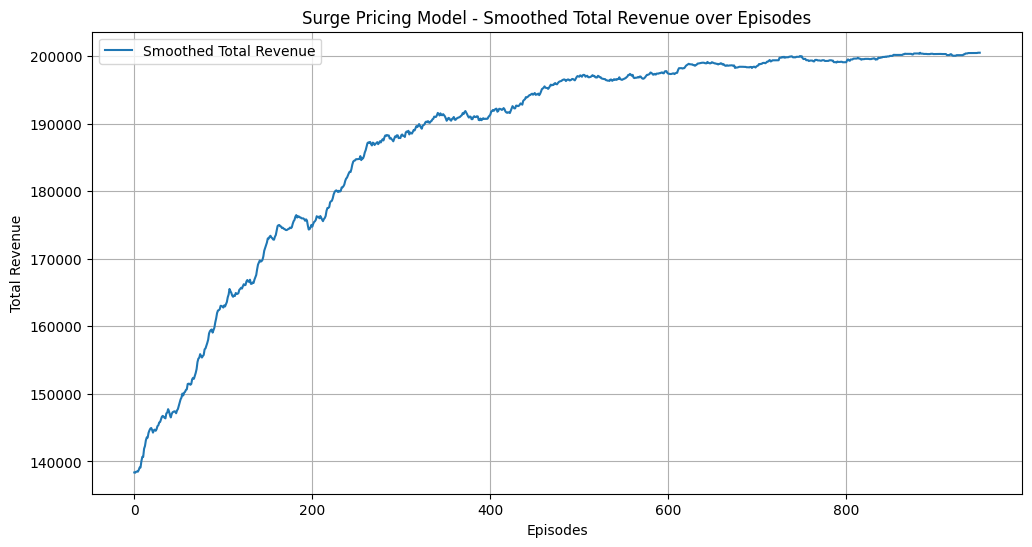

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (10).

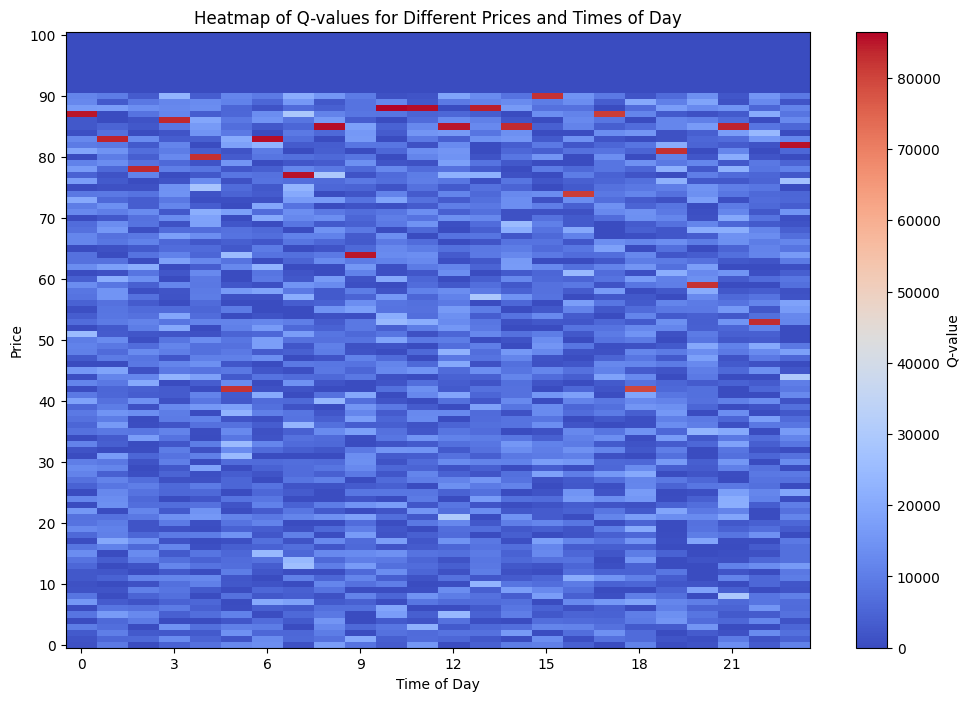

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Environment setup
class SurgePricingEnv:
    def __init__(self):
        self.max_price = 100  # Max price limit
        self.min_price = 10   # Min price limit
        self.demand_sensitivity = 0.1  # Demand sensitivity to price
        self.time_of_day_factor = 0.05  # Time of day effect on demand

    def get_demand(self, price, time_of_day):
        """
        Simulate the demand based on price and time of day.
        Price sensitivity factor increases demand when price decreases.
        """
        base_demand = 100  # Base demand at a price of 50
        demand = base_demand - self.demand_sensitivity * (price - 50) + self.time_of_day_factor * (time_of_day - 12)
        return max(demand, 0)  # Demand can't be negative

    def get_revenue(self, price, time_of_day):
        """
        Calculate the revenue based on price and demand.
        """
        demand = self.get_demand(price, time_of_day)
        return price * demand

    def step(self, price, time_of_day):
        """
        Simulate one step (time step) by returning the reward (revenue) and next state (price, time).
        """
        reward = self.get_revenue(price, time_of_day)
        next_time = (time_of_day + 1) % 24  # Cycle through 24-hour time frame
        return reward, next_time

# Q-learning agent
class QLearningAgent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros((101, 24))  # Q-table: (price, time_of_day)
        self.learning_rate = 0.1  # Alpha
        self.discount_factor = 0.9  # Gamma
        self.exploration_rate = 1.0  # Epsilon (for exploration)
        self.exploration_decay = 0.995  # Epsilon decay after each action

    def choose_action(self, time_of_day):
        """
        Choose an action (price) based on epsilon-greedy strategy.
        """
        if random.uniform(0, 1) < self.exploration_rate:
            return random.randint(self.env.min_price, self.env.max_price)  # Exploration
        else:
            return np.argmax(self.q_table[:, time_of_day]) + self.env.min_price  # Exploitation

    def learn(self, price, next_price, reward, next_time):
        """
        Update the Q-table using the Q-learning update rule.
        """
        current_q_value = self.q_table[price - self.env.min_price, time_of_day]
        max_future_q = np.max(self.q_table[:, next_time])  # Max Q-value for the next time step
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * max_future_q - current_q_value)
        self.q_table[price - self.env.min_price, time_of_day] = new_q_value

    def update_exploration_rate(self):
        """
        Decay exploration rate to reduce exploration over time.
        """
        self.exploration_rate *= self.exploration_decay

# Training process
env = SurgePricingEnv()
agent = QLearningAgent(env)

# Simulate for 1000 episodes
episodes = 1000
episode_rewards = []

for episode in range(episodes):
    total_reward = 0
    time_of_day = random.randint(0, 23)  # Random start time

    for _ in range(24):  # Simulate for 24 hours
        price = agent.choose_action(time_of_day)
        reward, next_time = env.step(price, time_of_day)
        total_reward += reward

        agent.learn(price, price, reward, next_time)
        time_of_day = next_time

    agent.update_exploration_rate()
    episode_rewards.append(total_reward)

# Smooth the rewards using a moving average to reduce noise
window_size = 50
smoothed_rewards = np.convolve(episode_rewards, np.ones(window_size)/window_size, mode='valid')

# Visualize the smoothed episode rewards
plt.figure(figsize=(12, 6))
plt.plot(smoothed_rewards, label='Smoothed Total Revenue')
plt.xlabel('Episodes')
plt.ylabel('Total Revenue')
plt.title('Surge Pricing Model - Smoothed Total Revenue over Episodes')
plt.grid(True)
plt.legend()
plt.show()

# Heatmap of the learned Q-table
plt.figure(figsize=(12, 8))
plt.imshow(agent.q_table, cmap='coolwarm', aspect='auto', origin='lower')
plt.colorbar(label="Q-value")
plt.xlabel('Time of Day')
plt.ylabel('Price')
plt.title('Heatmap of Q-values for Different Prices and Times of Day')
plt.xticks(np.arange(0, 24, 3), labels=np.arange(0, 24, 3))
plt.yticks(np.arange(0, 101, 10), labels=np.arange(10, 101, 10))
plt.show()

# Visualize Q-values for a specific time of day (e.g., 12 PM)
time_of_day = 12  # Example: 12 PM
prices = np.arange(env.min_price, env.max_price + 1)
q_values = [agent.q_table[price - env.min_price, time_of_day] for price in prices]

plt.figure(figsize=(12, 6))
plt.plot(prices, q_values, marker='o', color='b')
plt.xlabel('Price')
plt.ylabel('Q-value')
plt.title(f'Q-values for Time of Day {time_of_day} PM')
plt.grid(True)
plt.show()


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (10).

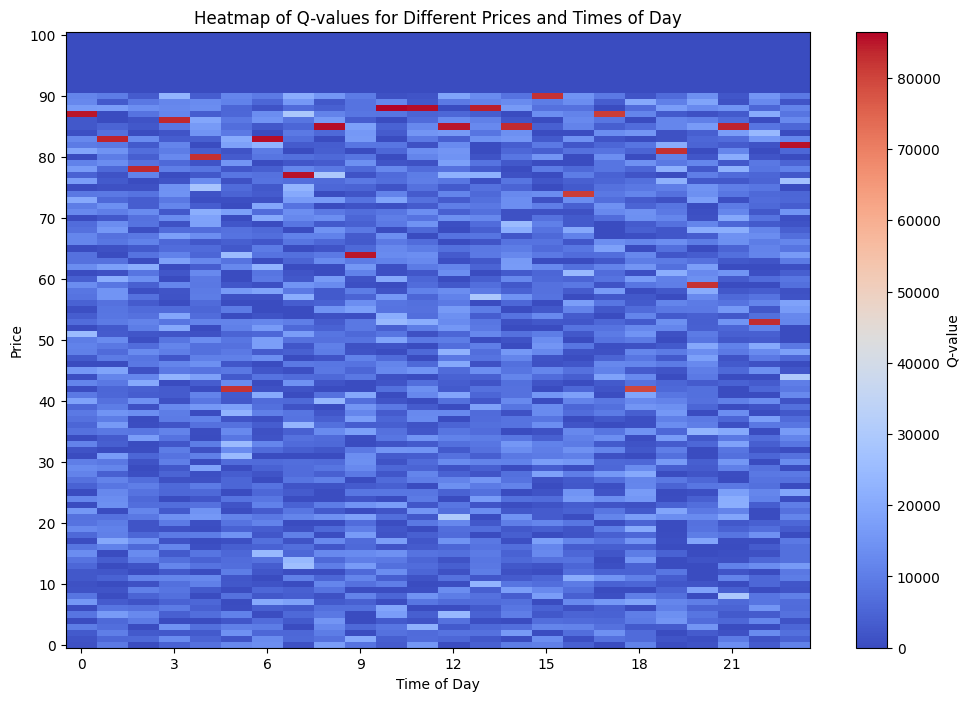

In [3]:
# Heatmap of the learned Q-table
plt.figure(figsize=(12, 8))
plt.imshow(agent.q_table, cmap='coolwarm', aspect='auto', origin='lower')
plt.colorbar(label="Q-value")
plt.xlabel('Time of Day')
plt.ylabel('Price')
plt.title('Heatmap of Q-values for Different Prices and Times of Day')

# Fixing the ticks for the y-axis
plt.xticks(np.arange(0, 24, 3), labels=np.arange(0, 24, 3))
plt.yticks(np.arange(0, 101, 10), labels=np.arange(10, 101, 10))  # Make sure ticks and labels match

plt.show()


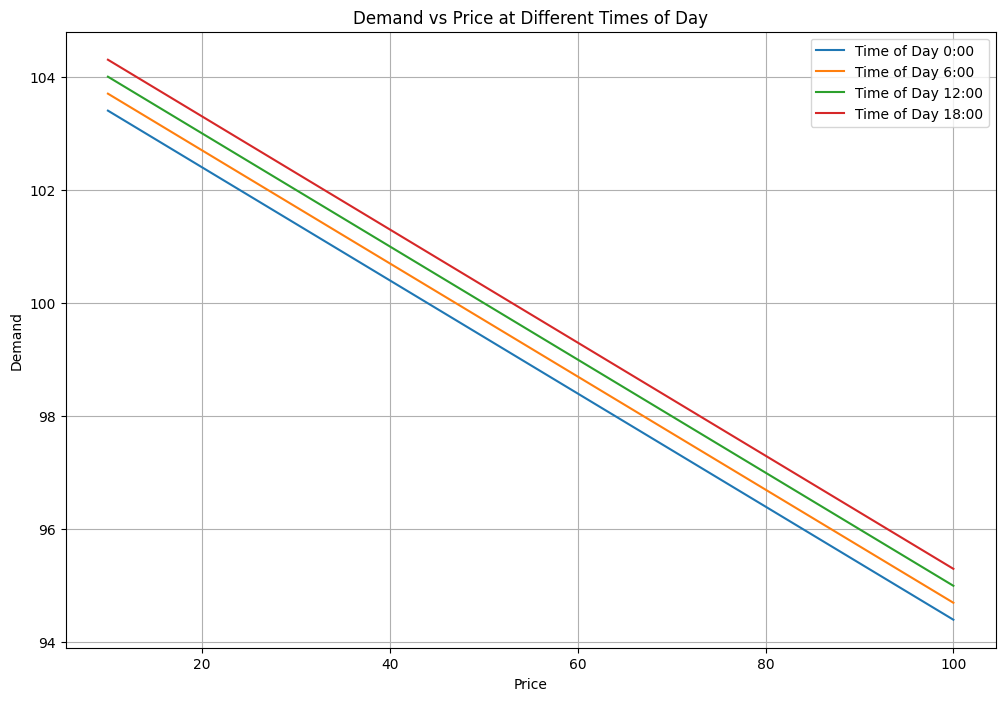

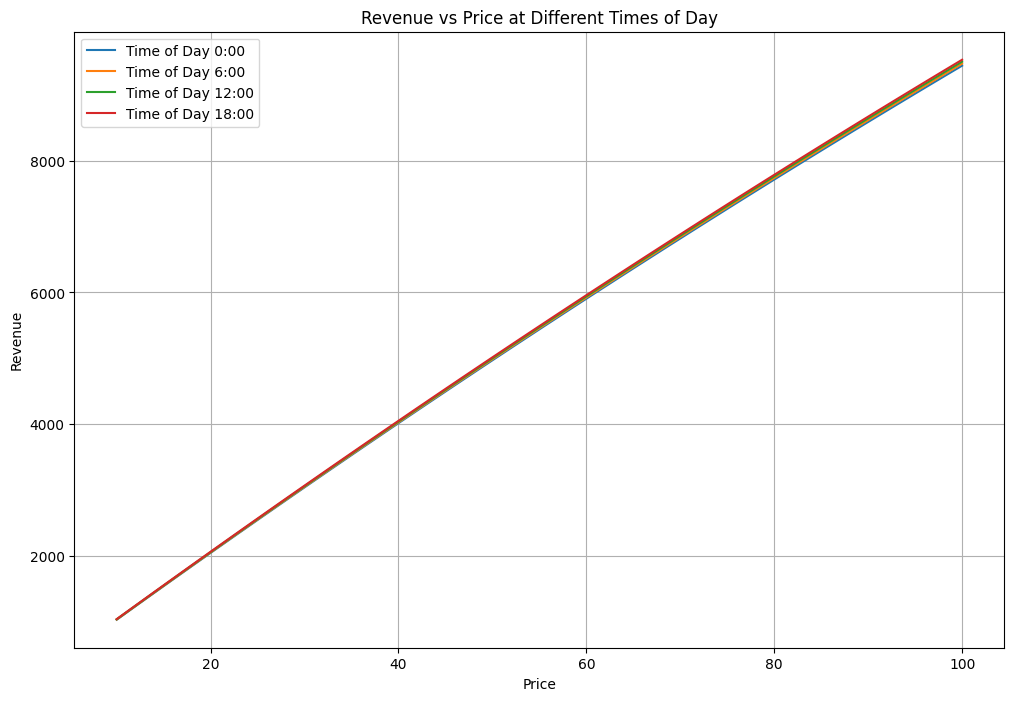

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Environment setup
class SurgePricingEnv:
    def __init__(self):
        self.max_price = 100  # Max price limit
        self.min_price = 10   # Min price limit
        self.demand_sensitivity = 0.1  # Demand sensitivity to price
        self.time_of_day_factor = 0.05  # Time of day effect on demand

    def get_demand(self, price, time_of_day):
        """
        Simulate the demand based on price and time of day.
        Price sensitivity factor increases demand when price decreases.
        """
        base_demand = 100  # Base demand at a price of 50
        demand = base_demand - self.demand_sensitivity * (price - 50) + self.time_of_day_factor * (time_of_day - 12)
        return max(demand, 0)  # Demand can't be negative

    def get_revenue(self, price, time_of_day):
        """
        Calculate the revenue based on price and demand.
        """
        demand = self.get_demand(price, time_of_day)
        return price * demand

    def step(self, price, time_of_day):
        """
        Simulate one step (time step) by returning the reward (revenue) and next state (price, time).
        """
        reward = self.get_revenue(price, time_of_day)
        next_time = (time_of_day + 1) % 24  # Cycle through 24-hour time frame
        return reward, next_time

# Training process to get demand and revenue for different prices and times of day
env = SurgePricingEnv()
prices = np.arange(env.min_price, env.max_price + 1)  # Price range
time_of_day = np.arange(0, 24)  # Time of day range (0 to 23 hours)

# Arrays to store demand and revenue values
demand_matrix = np.zeros((len(prices), len(time_of_day)))
revenue_matrix = np.zeros((len(prices), len(time_of_day)))

# Populate the demand and revenue matrices
for i, price in enumerate(prices):
    for j, time in enumerate(time_of_day):
        demand_matrix[i, j] = env.get_demand(price, time)
        revenue_matrix[i, j] = env.get_revenue(price, time)

# Visualizing Demand vs Price (for each time of day)
plt.figure(figsize=(12, 8))
for t in range(0, 24, 6):  # Plot demand for every 6 hours to avoid clutter
    plt.plot(prices, demand_matrix[:, t], label=f'Time of Day {t}:00')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.title('Demand vs Price at Different Times of Day')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing Revenue vs Price (for each time of day)
plt.figure(figsize=(12, 8))
for t in range(0, 24, 6):  # Plot revenue for every 6 hours to avoid clutter
    plt.plot(prices, revenue_matrix[:, t], label=f'Time of Day {t}:00')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Revenue vs Price at Different Times of Day')
plt.legend()
plt.grid(True)
plt.show()
